### Introduction

In [44]:
import numpy as np
from numpy import loadtxt
from xgboost import XGBClassifier # Extreme Gradient Boost Classifier
from xgboost import plot_importance # Used to plot feature importances from pre-trained model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = loadtxt('pima.csv', delimiter = ',')
X = data[:,0:8]
y = data[:,8]

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [6]:
seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = test_size, random_state = seed)

In [67]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [65]:
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", accuracy * 100.0)

Accuracy:  77.9220779221


### In the next part we will look at how we can use early stopping to limit overfitting.
The XGBoost model can evaluate and report on the performance on a test set for the model
during training. It supports this capability by specifying both a test dataset and an evaluation
metric on the call to model.fit() when training the model and specifying verbose output
(verbose=True). For example, we can report on the binary classification error rate (error) on
a standalone test set (eval set) while training an XGBoost model as follows:

In [66]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric = "logloss", 
          eval_set = eval_set, verbose = True,
          early_stopping_rounds = 10)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

print("Accuracy: ", accuracy * 100.0)

[0]	validation_0-logloss:0.660284
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.633188
[2]	validation_0-logloss:0.611107
[3]	validation_0-logloss:0.592087
[4]	validation_0-logloss:0.577545
[5]	validation_0-logloss:0.565459
[6]	validation_0-logloss:0.552978
[7]	validation_0-logloss:0.544117
[8]	validation_0-logloss:0.534974
[9]	validation_0-logloss:0.529147
[10]	validation_0-logloss:0.523495
[11]	validation_0-logloss:0.519157
[12]	validation_0-logloss:0.513293
[13]	validation_0-logloss:0.508292
[14]	validation_0-logloss:0.50541
[15]	validation_0-logloss:0.502277
[16]	validation_0-logloss:0.500996
[17]	validation_0-logloss:0.498203
[18]	validation_0-logloss:0.496092
[19]	validation_0-logloss:0.494517
[20]	validation_0-logloss:0.492048
[21]	validation_0-logloss:0.490866
[22]	validation_0-logloss:0.489825
[23]	validation_0-logloss:0.489278
[24]	validation_0-logloss:0.487723
[25]	validation_0-logloss:0.487428
[26]	validation_0-logloss:0.48600

### In the next Part we will look at how we calculate the importance of features using XGBoost.
A benefit of using ensembles of decision tree methods like gradient boosting is that they can
automatically provide estimates of feature importance from a trained predictive model. A
trained XGBoost model automatically calculates feature importance on your predictive modeling
problem. These importance scores are available in the feature importances member variable
of the trained model. For example, they can be printed directly as follows:

[ 0.04895105  0.24475524  0.05944056  0.08741259  0.04545455  0.18181819
  0.16083916  0.17132868]


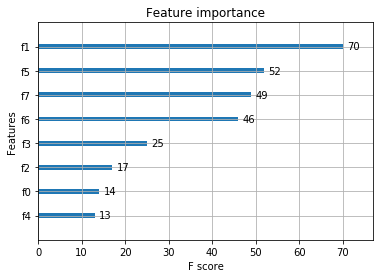

In [46]:
print(model.feature_importances_)
plot_importance(model)
plt.show()

In [60]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### In the next part we will look at heuristics for best configuring the gradient boosting algorithm.
Gradient boosting is one of the most powerful techniques for applied machine learning and as
such is quickly becoming one of the most popular. But how do you configure gradient boosting
on your problem? A number of configuration heuristics were published in the original gradient
boosting papers. They can be summarized as:
<ol>
    <li>Learning rate or shrinkage (learning rate in XGBoost) should be set to 0.1 or lower,
and smaller values will require the addition of more trees. 
   </li>  
    
    <li>
    The depth of trees (tree depth in XGBoost) should be configured in the range of 2-to-8,
where not much benefit is seen with deeper trees.
   </li>  
   
   <li>Row sampling (subsample in XGBoost) should be configured in the range of 30% to 80%
of the training dataset, and compared to a value of 100% for no sampling.
   </li>  
   
</ol>

These are a good starting points when configuring your model. A good general configuration
strategy is as follows:

<ol>
    <li>
    Run the default configuration and review plots of the learning curves on the training and
validation datasets.
    </li>
    
     <li>
   If the system is overlearning, decrease the learning rate and/or increase the number of
trees.
    </li>
    
     <li>
    If the system is underlearning, speed the learning up to be more aggressive by increasing
the learning rate and/or decreasing the number of trees.
    </li>
</ol>

### XGBoost Hyperparameter Tuning
The scikit-learn framework provides the capability to search combinations of parameters. This
capability is provided in the GridSearchCV class and can be used to discover the best way to
configure the model for top performance on your problem. For example, we can define a grid of
the number of trees (n estimators) and tree sizes (max depth) to evaluate by defining a grid
as:
<b>
    <br>n_estimators = [50, 100, 150, 200]
    <br>max_depth = [2, 4, 6, 8]
    <br>param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
</b>

And then evaluate each combination of parameters using 10-fold cross-validation as:
<b>
    <br>kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    <br>grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
    <br>result = grid_search.fit(X, label_encoded_y)
<b>

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [56]:
model = XGBClassifier()

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring = "neg_log_loss", n_jobs=-1, cv=kfold)

grid_result = grid_search.fit(X, y)

In [55]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.483304 using {'learning_rate': 0.1}
-0.689811 (0.000475) with: {'learning_rate': 0.0001}
-0.661827 (0.004625) with: {'learning_rate': 0.001}
-0.531155 (0.028945) with: {'learning_rate': 0.01}
-0.483304 (0.055151) with: {'learning_rate': 0.1}
-0.515642 (0.061723) with: {'learning_rate': 0.2}
-0.554158 (0.067557) with: {'learning_rate': 0.3}
